## Downstream canyon run with conduino, probes ANK1 and ANK2, low N, 

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye.

### Specifics and notes
* 400 g salt into bucket 1
* Table profile f0=0.70, dt1=16.8s, f1=0.75, dt2=50, f2=0.78 rad/s.
* Taking water samples at two locations on shelf (break B and canyon head-ish distance A) to measure density throughout spin-up to check if drift in conduino readings is real.
* Profiler now has a guiding tube (PVC) to prevent it from swinging during casts. You need to push the probe down a bit during downcasts to make sure probe and cable don't get stuck at tube.   
* Conduino measurements every 30 min.
* Water used to fill tank sat overnight in the filling buckets to allow it to equilibrate at room temperature. We want to see if this helps with conduino measurements drifting during spin up.

Calibration for probes from 29 March 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P_probes_29mar19.ipynb)

### Stratification

Bucket 1 , 400 g salt

$\rho_1= 1.013958$ g cm$^{-3}$

$\rho_2= 0.99788$ g cm$^{-3}$

### Tank filling
Started: 11:49 am, ended: 1:28 pm.

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|13:30|checkup|checkup_13_30_3.mat|
|13:30|profile|before_spinup_profiles.mat|
|14:00|check up|checkup_14_00_3.mat|
|14:30|check up|checkup_14_30_3.mat|
|15:00|check up|checkup_15_00_3.mat|
|15:30|check up|checkup_15_30_3.mat|
|15:47|check up|checkup_15_47_3.mat|
|15:47(?)|profile|profile_initial_3.mat|
|15:55(?)|profile|profile_final_3.mat|


### Density samples

|time| $\rho$ station A (g cm$^{-3}$)| $\rho$ station B (g cm$^{-3}$)|
|:--:||:--:||:--:|
|13:30|1.00536|1.00731|
|14:00|1.00596|1.006855|
|14:30|1.00565|1.00703|
|15:00|1.00506|1.00650|
|15:30|1.00525|1.00698|
|15:50|1.00550|1.00679|


In [10]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 29 feb 2019 in calibration_29mar19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.997378+(0.006040*reading)+(0.001648*reading**2)+(0.000105*reading**3)
    return(fitP)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



In [13]:
def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### All readings 

Text(0.5,0,'time / s')

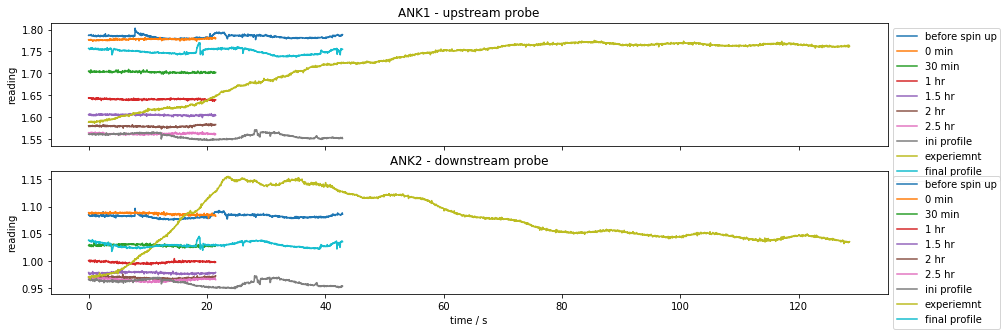

In [14]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr', '2 hr', '2.5 hr','ini profile','experiemnt','final profile']
colors = ['coral','lightskyblue']

filepaths = ['../../exp_30mar19/before_spinup_profiles_3.mat',
             '../../exp_30mar19/checkup_13_30_3.mat',
             '../../exp_30mar19/checkup_14_00_3.mat',
             '../../exp_30mar19/checkup_14_30_3.mat',
             '../../exp_30mar19/checkup_15_00_3.mat',
             '../../exp_30mar19/checkup_15_30_3.mat',
             '../../exp_30mar19/checkup_15_47_3.mat',
             '../../exp_30mar19/profile_initial_3.mat',
             '../../exp_30mar19/experiment_3.mat',
             '../../exp_30mar19/profile_final_3.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

before spin up 1.0081789056443713 1.008474377857223
0 min 1.0081299174542024 1.0085408888425142
30 min 1.0075469211330301 1.0077380010754295
1 hr 1.0070749440272027 1.0073221183009793
1.5 hr 1.0068071572372015 1.0070604594091221
2 hr 1.0066176892463372 1.0069430422211458
2.5 hr 1.0064905991222184 1.0068908223048594
ini profile 1.006453085978786 1.006825461142076
experiemnt 1.0077076787161465 1.0083681747542483
final profile 1.0079074460788573 1.0077501918307161


Text(0.5,0,'time / s')

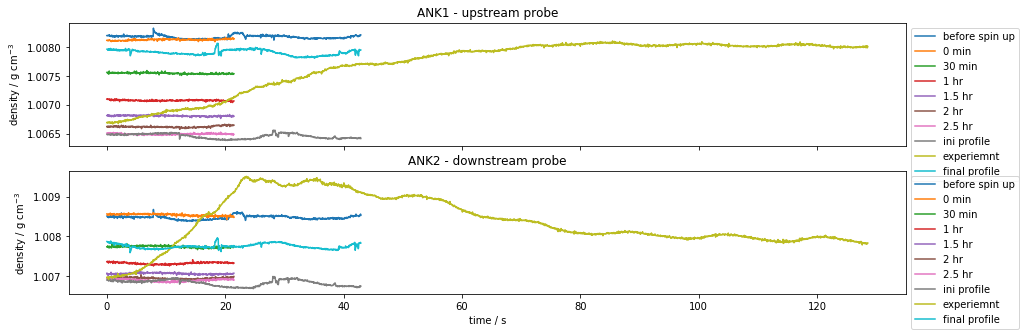

In [15]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr', '2 hr', '2.5 hr','ini profile','experiemnt','final profile']
colors = ['coral','lightskyblue']

filepaths = ['../../exp_30mar19/before_spinup_profiles_3.mat',
             '../../exp_30mar19/checkup_13_30_3.mat',
             '../../exp_30mar19/checkup_14_00_3.mat',
             '../../exp_30mar19/checkup_14_30_3.mat',
             '../../exp_30mar19/checkup_15_00_3.mat',
             '../../exp_30mar19/checkup_15_30_3.mat',
             '../../exp_30mar19/checkup_15_47_3.mat',
             '../../exp_30mar19/profile_initial_3.mat',
             '../../exp_30mar19/experiment_3.mat',
             '../../exp_30mar19/profile_final_3.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    densP1 = dens_ANK1(P1)
    densP2 = dens_ANK2(P2)
    ax0.plot(time,densP1, label=lab)
    ax1.plot(time,densP2, label=lab)
    print(lab, np.mean(densP1), np.mean(densP2))
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

Change in density throughout spin up is 

In [16]:
DeltaANK1 = 1.0081299174542024-1.0064905991222184 
DeltaANK2 = 1.0085408888425142-1.0068908223048594

print(DeltaANK1, DeltaANK2)

0.001639318331984052 0.0016500665376548707


../../exp_30mar19/before_spinup_profiles_3.mat
../../exp_30mar19/profile_initial_3.mat
../../exp_30mar19/experiment_3.mat
../../exp_30mar19/profile_final_3.mat


Text(0.5,0,'time / s')

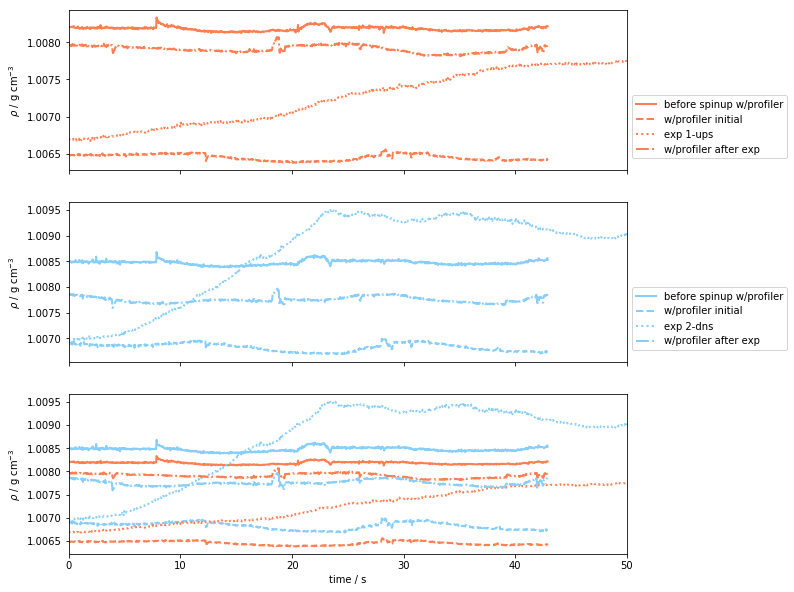

In [17]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10), sharex=True)

labels1 = ['before spinup w/profiler', 'w/profiler initial','exp 1-ups','w/profiler after exp']
labels2 = ['before spinup w/profiler', 'w/profiler initial','exp 2-dns','w/profiler after exp']

colors = ['coral','lightskyblue']

filepaths = ['../../exp_30mar19/before_spinup_profiles_3.mat',
             '../../exp_30mar19/profile_initial_3.mat',
             '../../exp_30mar19/experiment_3.mat',
             '../../exp_30mar19/profile_final_3.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [2,2,2,2,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'] 
    P2 = mat['ch2'] 
    density_1 = dens_ANK1(P1)
    density_2 = dens_ANK2(P2)
    
    time = mat['time']
    ax0.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    ax2.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax2.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,0.5))
ax1.legend(bbox_to_anchor=(1,0.5))

ax0.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax1.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

ax0.set_xlim(0,50)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)

ax2.set_xlabel('time / s')

Notes:
    


### Profiles

Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

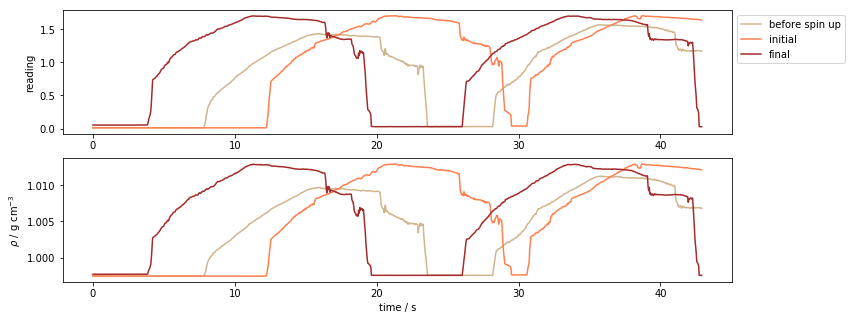

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))

colors = ['white','tan','coral','brown']

filepath_ini0 = '../../exp_30mar19/before_spinup_profiles_3.mat'
filepath_ini = '../../exp_30mar19/profile_initial_3.mat'
filepath_fin = '../../exp_30mar19/profile_final_3.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax1.plot(time_ini0,P_ini0, label='before spin up', color=colors[1])
ax1.plot(time_ini,P_ini, label='initial', color=colors[2])
ax1.plot(time_fin,P_fin, label='final', color=colors[3])
ax2.plot(time_ini0,dens_P_ini0, label='before spin up', color=colors[1])
ax2.plot(time_ini,dens_P_ini, label='initial', color=colors[2])
ax2.plot(time_fin,dens_P_fin, label='final', color=colors[3])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')


Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

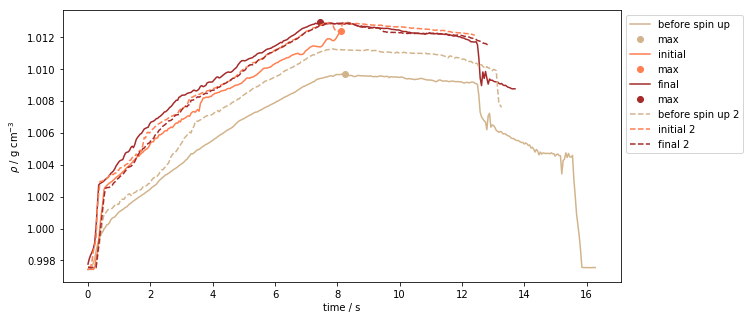

In [19]:
fig, (ax2) = plt.subplots(1,1, figsize=(10,5))

filepath_ini0 = '../../exp_30mar19/before_spinup_profiles_3.mat'
filepath_ini = '../../exp_30mar19/profile_initial_3.mat'
filepath_fin = '../../exp_30mar19/profile_final_3.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax2.plot(time_ini0[180:560]-time_ini0[180],dens_P_ini0[180:560], label='before spin up', color=colors[1])
ind = np.argmax(dens_P_ini0[180:560])
ax2.plot(time_ini0[ind],dens_P_ini0[180:560][ind],'o', label='max', color=colors[1])

ax2.plot(time_ini[280:470]-time_ini[280],dens_P_ini[280:470], label='initial', color=colors[2])
ind = np.argmax(dens_P_ini[280:470])
ax2.plot(time_ini[ind],dens_P_ini[280:470][ind],'o', label='max', color=colors[2])

ax2.plot(time_fin[90:410]-time_fin[90],dens_P_fin[90:410], label='final', color=colors[3])
ind = np.argmax(dens_P_fin[90:410])
ax2.plot(time_fin[ind],dens_P_fin[90:410][ind],'o', label='max', color=colors[3])

ax2.plot(time_ini0[650:960]-time_ini0[650],dens_P_ini0[650:960],'--', label='before spin up 2', color=colors[1])
ax2.plot(time_ini[710:1060]-time_ini[710],dens_P_ini[710:1060],'--', label='initial 2', color=colors[2])
ax2.plot(time_fin[600:900]-time_fin[600],dens_P_fin[600:900],'--', label='final 2', color=colors[3])

ax2.legend(bbox_to_anchor=(1,1))
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')


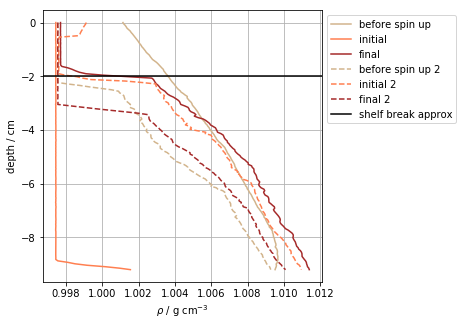

In [20]:
fig, (ax2) = plt.subplots(1,1, figsize=(5,5))

filepath_ini0 = '../../exp_30mar19/before_spinup_profiles_3.mat'
filepath_ini = '../../exp_30mar19/profile_initial_3.mat'
filepath_fin = '../../exp_30mar19/profile_final_3.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

max_depth=9.2 # cm
ax2.plot(dens_P_ini0[205:380],-time2dist(max_depth,(time_ini0[205:380]-time_ini0[205])), label='before spin up', color=colors[1])

ax2.plot(dens_P_ini[122:292],-time2dist(max_depth,time_ini[122:292]-time_ini[122]), label='initial', color=colors[2])

ax2.plot(dens_P_fin[60:230], -time2dist(max_depth,time_fin[60:230]-time_fin[60]),label='final', color=colors[3])

ax2.plot(dens_P_ini0[615:785],-time2dist(max_depth,time_ini0[615:785]-time_ini0[615]),'--', label='before spin up 2', color=colors[1])
ax2.plot(dens_P_ini[677:847],-time2dist(max_depth,time_ini[677:847]-time_ini[677]),'--', label='initial 2', color=colors[2])
ax2.plot(dens_P_fin[550:720],-time2dist(max_depth,time_fin[550:720]-time_fin[550]),'--', label='final 2', color=colors[3])

ax2.axhline(-2,color='k', label='shelf break approx')
ax2.legend(bbox_to_anchor=(1,1))
ax2.set_ylabel('depth / cm')
ax2.set_xlabel(r'$\rho$ / g cm$^{-3}$')
ax2.grid(axis='both')

### Experiment

../../exp_30mar19/experiment_3.mat


Text(0.5,0,'sample')

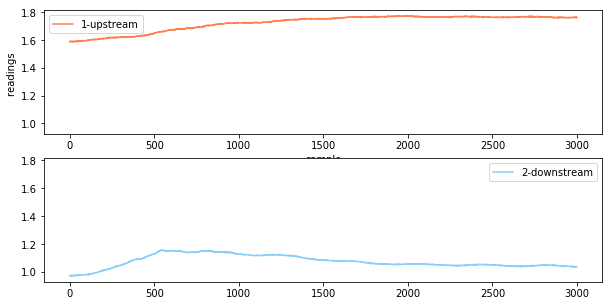

In [21]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']

filepath = '../../exp_30mar19/experiment_3.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color='coral')
ax1.plot(P2,'-', label=labels[1], color='lightskyblue')


ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density')

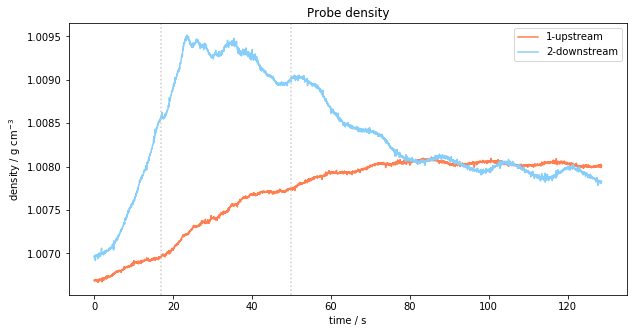

In [28]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1),'-', label=labels[0], color='coral')
ax0.plot(time,dens_ANK2(P2),'-', label=labels[1], color='lightskyblue')
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density')

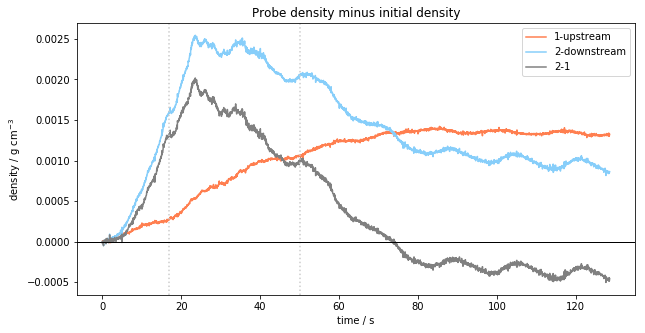

In [22]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color='coral')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color='lightskyblue')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### Comparison between 1 and 2 canyon runs with low N

../../exp_28mar19/experiment_2.mat


Text(0.5,1,'Density change (from intial values) at canyon heads')

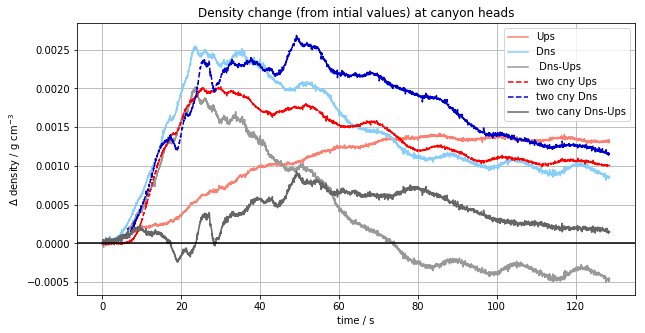

In [23]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_two = '../../exp_28mar19/experiment_2.mat'

print(filepath_two)
    
mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups', color='salmon')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns', color='lightskyblue')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label=' Dns-Ups', color='0.6')

ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0],'--', label='two cny Ups', color='red')
ax0.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0],'--', label='two cny Dns', color='mediumblue')
ax0.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0]-(dens_ANK1(P1_two)-dens_ANK1(P1_two)[0]),
         '-', label='two cany Dns-Ups', color='0.4')
ax0.axhline(0, color='k')
ax0.grid(axis='both')
ax0.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.set_title('Density change (from intial values) at canyon heads')

Text(0.5,1,'Density change (from intial values) at canyon heads - Subtracting shelf upwelling (UPS covered)')

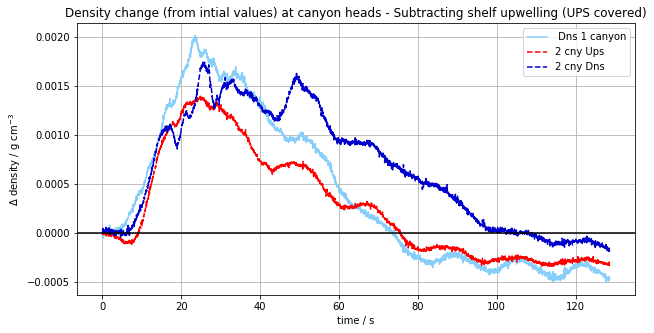

In [24]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label=' Dns 1 canyon', color='lightskyblue')

ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'--', label='2 cny Ups', color='red')
ax0.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'--', label='2 cny Dns', color='mediumblue')
         
ax0.axhline(0,color='k')
ax0.grid(axis='both')
ax0.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.set_title('Density change (from intial values) at canyon heads - Subtracting shelf upwelling (UPS covered)')

In [26]:
# diffusivity length scale for time scale T

Ks = 1E-9 # m^2s^-1
T = 3600 # sec (1 hour)

L = np.sqrt(T*Ks)

print('Assuming Ks O(10^{-9} m^2s^{-1}) and T is about 3600 s (1 hour), then the diffusion length scale L is about %1.0e m ' %L)

Assuming Ks O(10^{-9} m^2s^{-1}) and T is about 3600 s (1 hour), then the diffusion length scale L is about 2e-03 m 
